<a href="https://colab.research.google.com/github/eddie-coding/Sign_Language_Recognition/blob/master/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      reader = csv.reader(training_file, delimiter=',')    
      imgs = []
      lbls = []
      next(reader,None)
      for row in training_file:
        row = row.split(",")
        label=np.array(row[0]).astype(float) 
        image_string=np.array(row[1:785])
        image=image_string.astype(float)
        image=np.array_split(image,28)
        image=np.array(image)
        imgs.append(image)
        lbls.append(label)

      images=np.array(imgs)
      labels=np.array(lbls)

    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
	  rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
    

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
    
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')                                                                       
])
    

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=20
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=20
)


# Train the Model
history = model.fit(train_gen, steps_per_epoch=1373, epochs=20, validation_data=val_gen, validation_steps=359, verbose=1)


model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/20
1373/1373 [==============================] - 40s 29ms/step - loss: 2.5010 - accuracy: 0.2355 - val_loss: 1.4208 - val_accuracy: 0.5496
Epoch 2/20
1373/1373 [==============================] - 40s 29ms/step - loss: 1.5986 - accuracy: 0.4826 - val_loss: 0.8891 - val_accuracy: 0.6464
Epoch 3/20
1373/1373 [==============================] - 40s 29ms/step - loss: 1.1636 - accuracy: 0.6185 - val_loss: 0.8154 - val_accuracy: 0.7341
Epoch 4/20
1373/1373 [==============================] - 40s 29ms/step - loss: 0.9151 - accuracy: 0.6971 - val_loss: 0.5744 - val_accuracy: 0.8080
Epoch 5/20
1373/1373 [==============================] - 40s 29ms/step - loss: 0.7668 - accuracy: 0.7478 - val_loss: 0.3955 - val_accuracy: 0.8717
Epoch 6/20
1373/1373 [==============================] - 40s 29ms/step - loss: 0.6611 - accuracy: 0.7819 - val_loss: 0.3707 - val_accuracy: 0.8802
Epoch 7/20
1373/1373 [==============================] - 40s 29ms/step - loss: 0.5901 - accuracy: 0.8036 - val_loss: 0.3500 -

[6.92426086682151, 0.56609035]

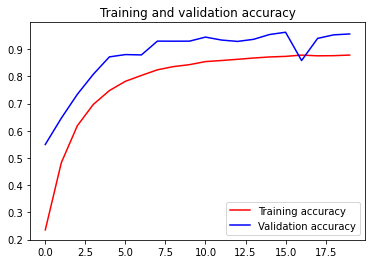

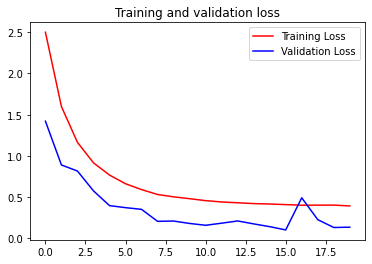

In [10]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()